In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [4]:
df = pd.read_csv('/Users/admin/Downloads/LetsGoToTheMovies2-Eman/data/raw/IMDB-Movie-Data.csv')

In [5]:
df.head()

,Unnamed: 0,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [6]:
selected = ['Title', 'Unnamed: 0', 'Genre', 'Actors', 'Director']
df_clean = df.drop(selected, axis = 1)

In [7]:
df_clean

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,2014,121,8.1,757074,333.13,76.0
1,2,2012,124,7.0,485820,126.46,65.0
2,3,2016,117,7.3,157606,138.12,62.0
3,4,2016,108,7.2,60545,270.32,59.0
4,5,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...
833,994,2010,97,5.9,140900,60.13,37.0
834,995,2012,88,6.7,164088,54.72,48.0
835,997,2007,94,5.5,73152,17.54,46.0
836,998,2008,98,6.2,70699,58.01,50.0


In [8]:
df_clean["Metascore"].dropna()

0      76.0
1      65.0
2      62.0
3      59.0
4      40.0
       ... 
833    37.0
834    48.0
835    46.0
836    50.0
837    11.0
Name: Metascore, Length: 838, dtype: float64

In [9]:
# split data into "X" and "y" set
X = df_clean.drop('Metascore', axis=1)
y = df_clean["Metascore"]



In [10]:
# TODO: split your data into a training and testing set,
#  with 25% of data in the test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
# TODO: make linear regression object
reg = LinearRegression()

# fit model to data
reg.fit(X,y)

LinearRegression()

In [12]:
# TODO: score model on X_train & y_train
r2 = reg.score(X_train,y_train)
print("R^2:", r2)

# TODO: generate predictions on X_test
y_pred = reg.predict(X_test)

R^2: 0.451817118142814


In [13]:
# Calculate residuals 

residuals = y_test - y_pred

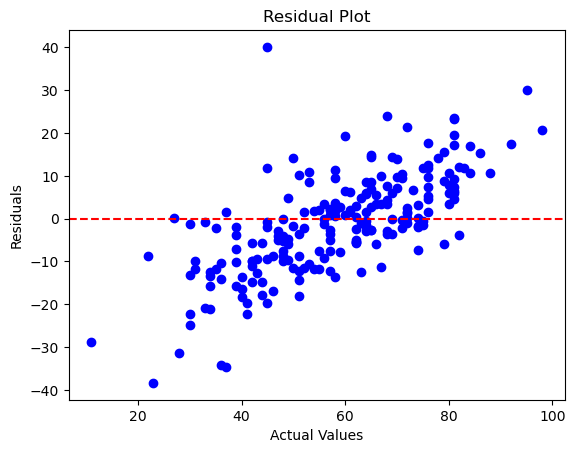

In [14]:
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

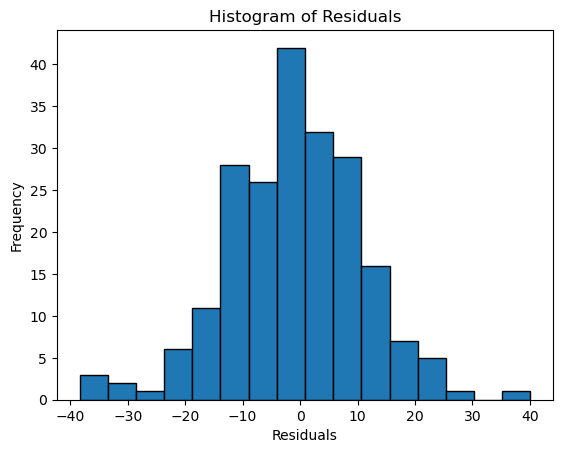

In [15]:
plt.hist(residuals, bins='auto', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

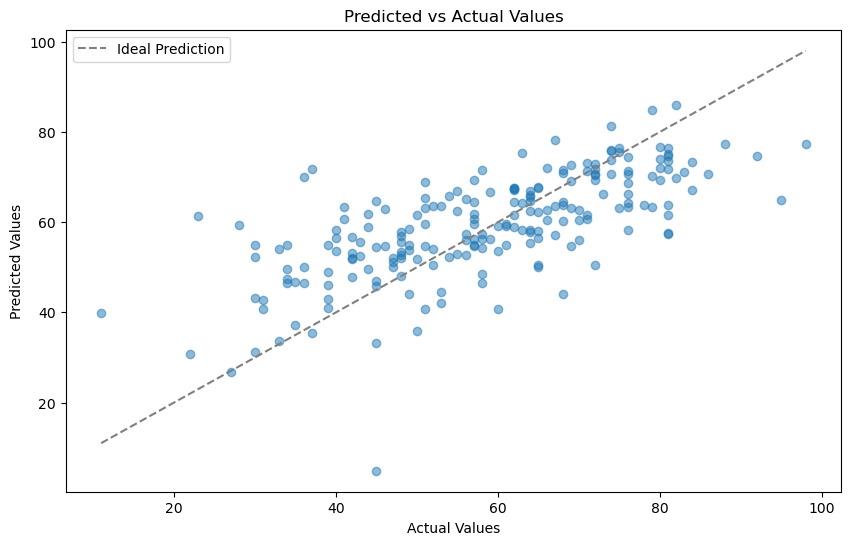

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray', label='Ideal Prediction')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()